# Imports

In [1]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#data science - standard library
import pandas as pd
import numpy as np

#regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Read in data

In [3]:
filepath = "booth_cities.csv"
df = pd.read_csv(filepath)

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Khani,41.96,42.96,64.40,60.37,63,1015,8.05,8.05
1,Marang,5.21,103.21,75.09,82.56,94,1010,3.36,3.36
2,Labuhan,-6.88,112.21,81.72,87.93,78,1012,6.51,6.51
3,Ushuaia,-54.80,-68.30,57.20,51.21,54,998,6.93,6.93
4,Lebu,-37.62,-73.65,50.86,46.35,78,1024,5.66,5.66


In [4]:
df.shape

(561, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
City           561 non-null object
Latitude       561 non-null float64
Longitude      561 non-null float64
Temperature    561 non-null float64
Feels Like     561 non-null float64
Humidity       561 non-null int64
Pressure       561 non-null int64
Wind Speed     561 non-null float64
Cloudiness     561 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 39.6+ KB


In [6]:
df.describe()

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,19.801141,19.223708,57.306275,53.679750,72.525847,1014.042781,8.235597,8.235597
std,33.228263,89.926919,22.722090,27.604757,20.473845,9.938110,6.095850,6.095850
min,-54.800000,-175.200000,-16.400000,-23.960000,12.000000,961.000000,0.340000,0.340000
25%,-8.930000,-61.310000,43.700000,33.800000,62.000000,1010.000000,3.940000,3.940000
50%,24.470000,24.410000,62.600000,58.100000,78.000000,1013.000000,6.930000,6.930000
75%,47.500000,100.340000,75.420000,76.440000,88.000000,1020.000000,11.410000,11.410000
max,78.220000,179.320000,93.200000,95.430000,100.000000,1041.000000,39.950000,39.950000


# Numeric vizzes

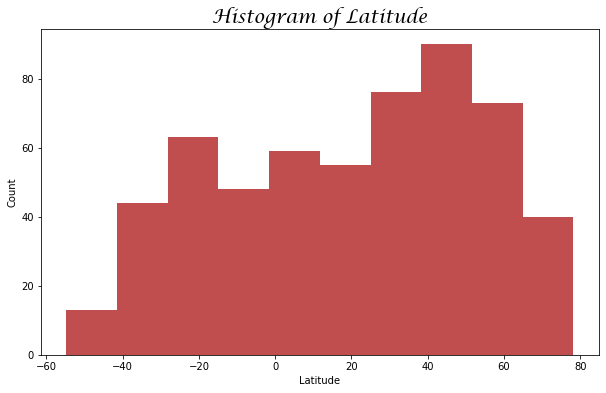

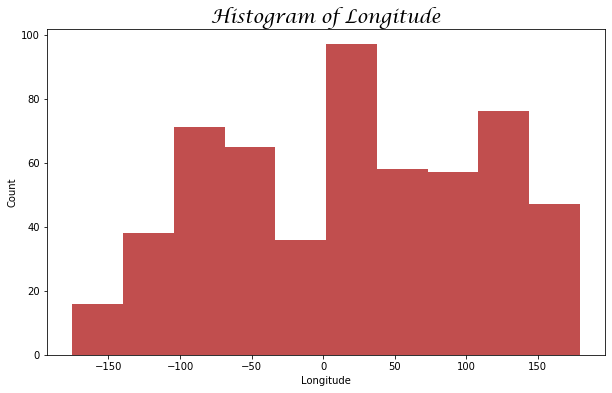

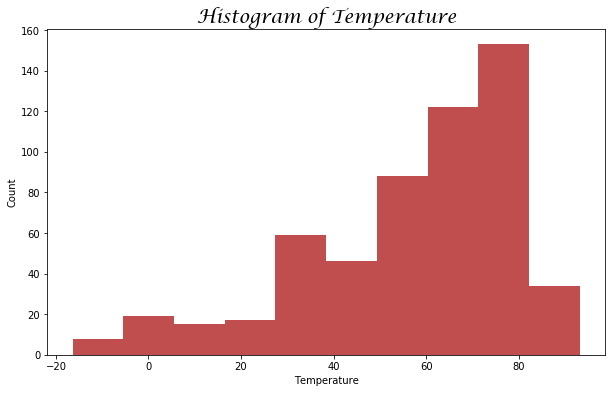

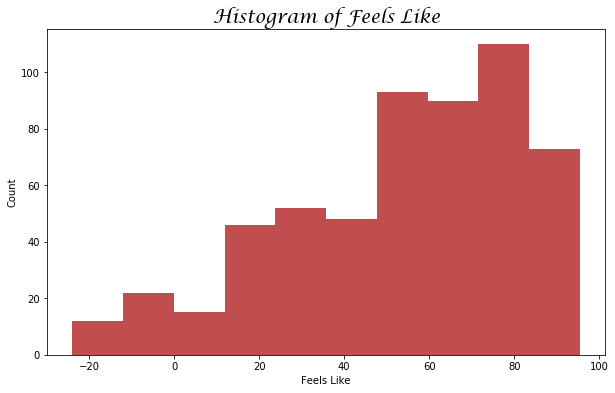

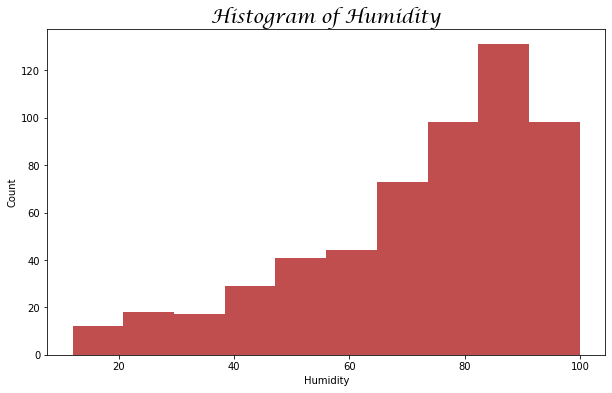

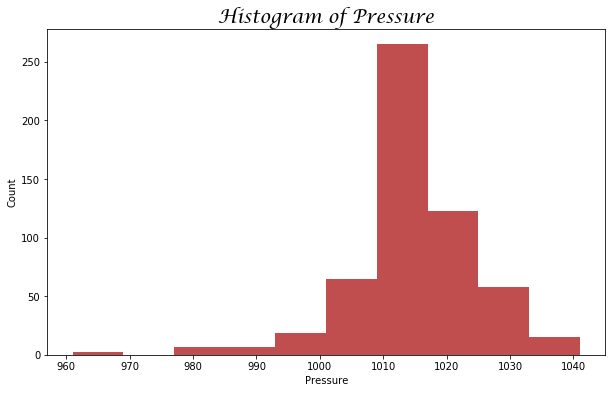

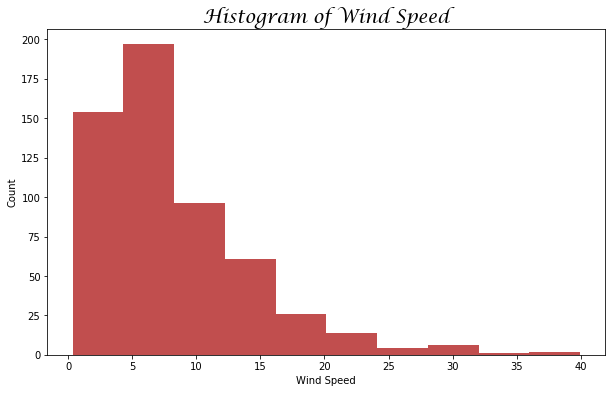

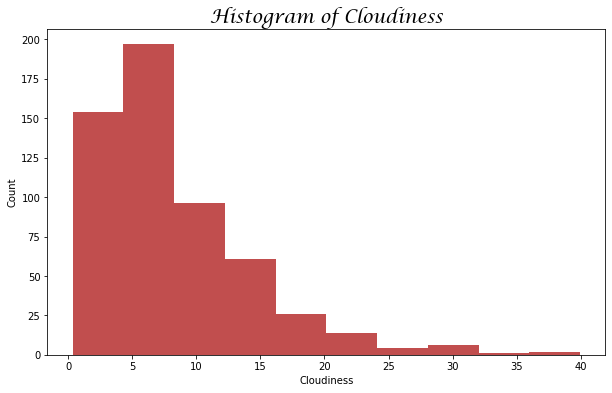

In [7]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        plt.hist(df[col], color = "firebrick", alpha=0.8)
        plt.title(f"Histogram of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

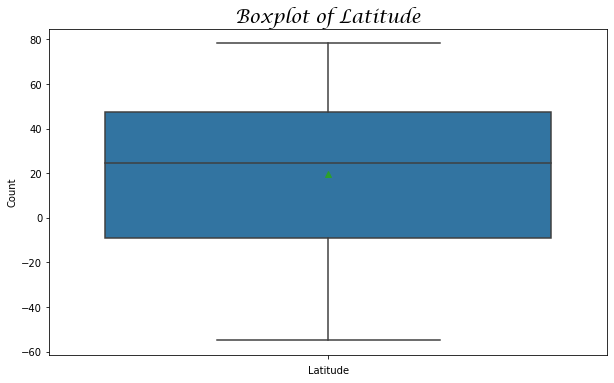

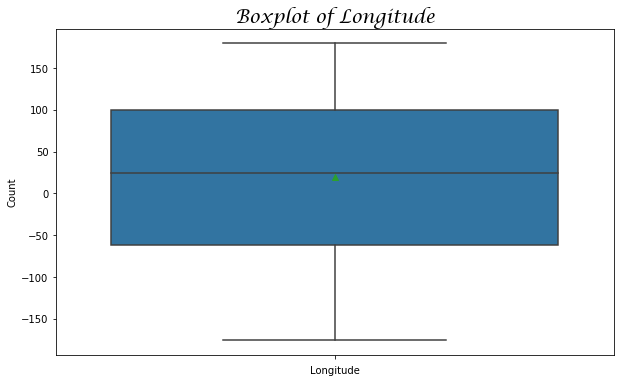

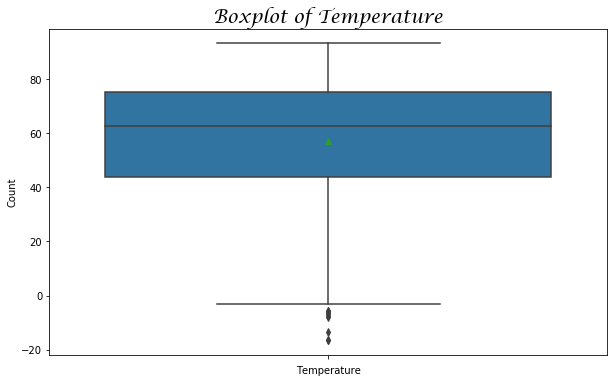

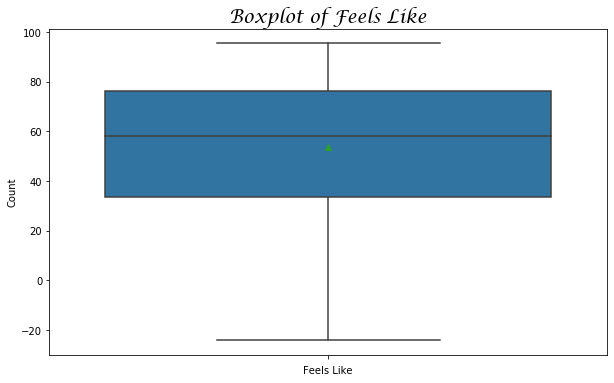

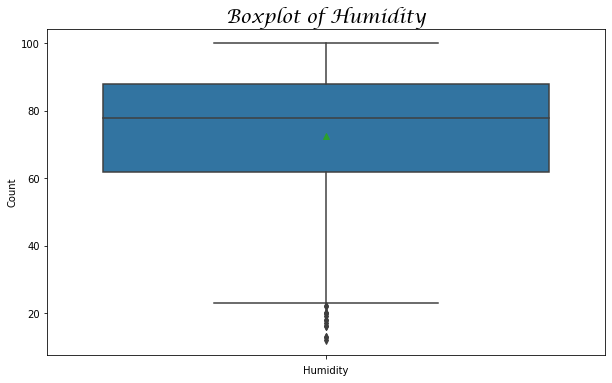

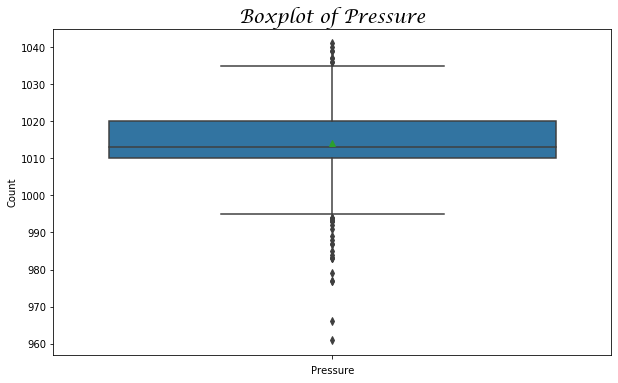

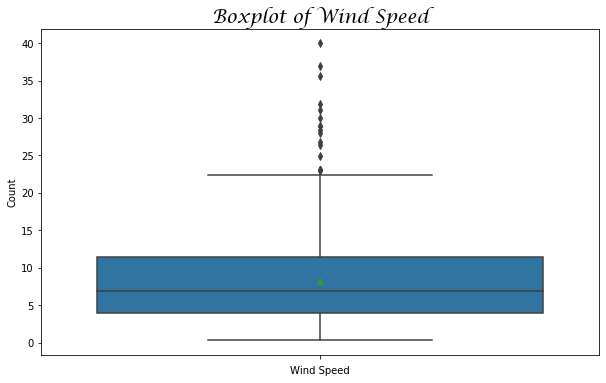

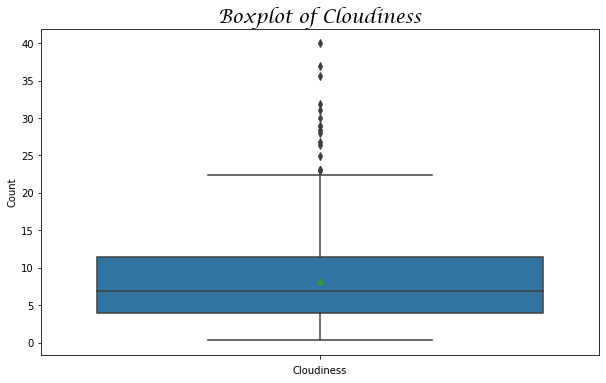

In [10]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.boxplot(y=col, data=df, showmeans="True")
        plt.title(f"Boxplot of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

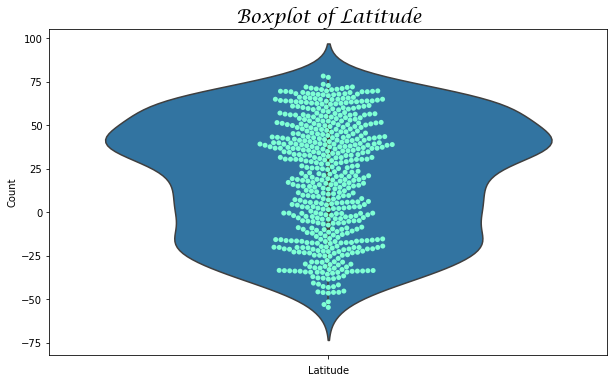

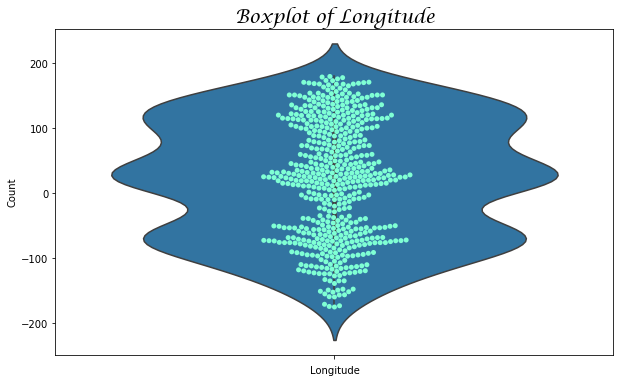

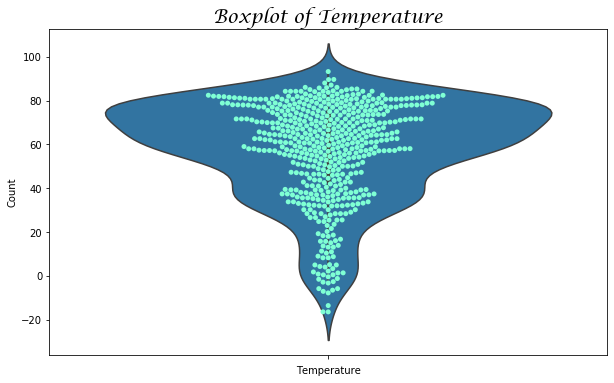

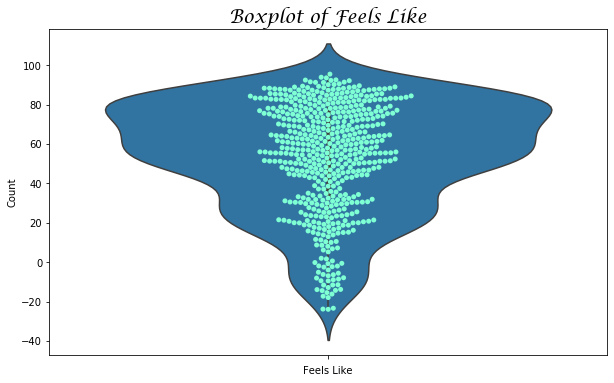

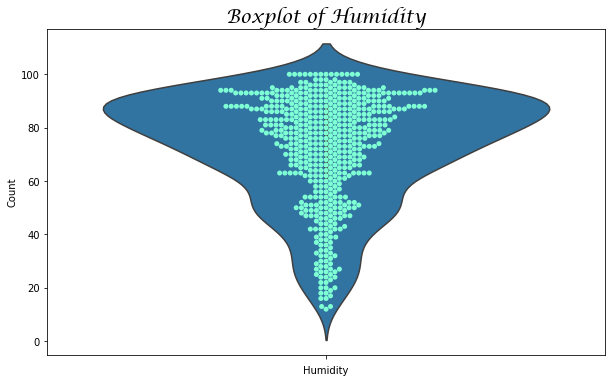

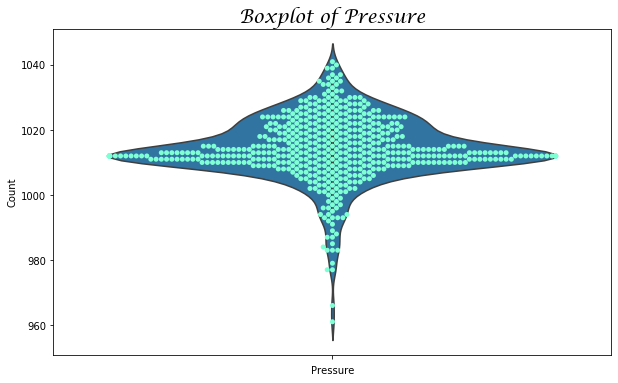

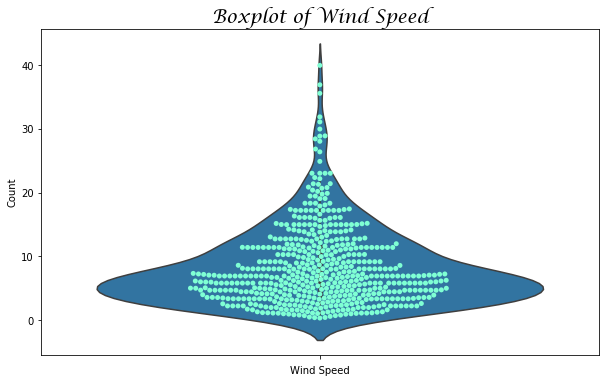

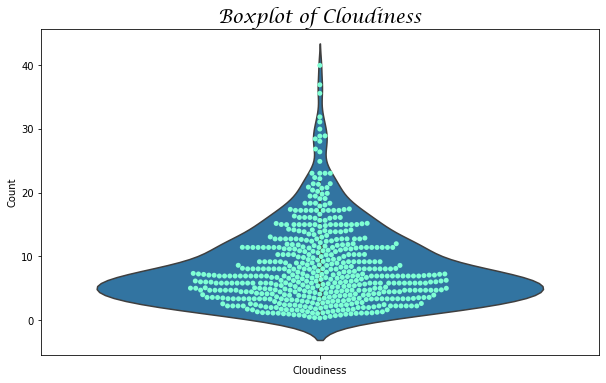

In [21]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.violinplot(y=col, data=df, showmeans="True")
        sns.swarmplot(y=col, data=df, color="aquamarine")
        plt.title(f"Violin Plot of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

In [25]:
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness,Hemisphere_NS,Hemisphere_WE
0,Khani,41.96,42.96,64.40,60.37,63,1015,8.05,8.05,Northern,Eastern
1,Marang,5.21,103.21,75.09,82.56,94,1010,3.36,3.36,Northern,Eastern
2,Labuhan,-6.88,112.21,81.72,87.93,78,1012,6.51,6.51,Southern,Eastern
3,Ushuaia,-54.80,-68.30,57.20,51.21,54,998,6.93,6.93,Southern,Western
4,Lebu,-37.62,-73.65,50.86,46.35,78,1024,5.66,5.66,Southern,Western


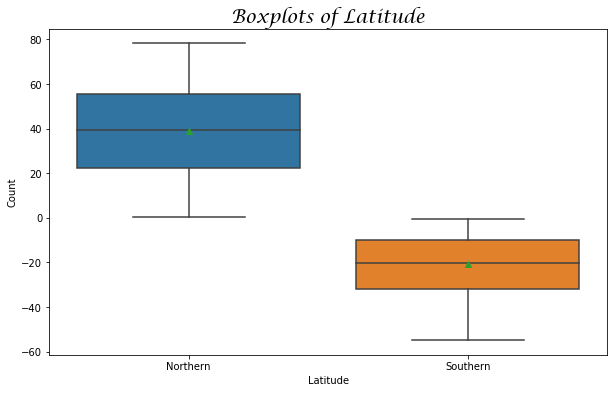

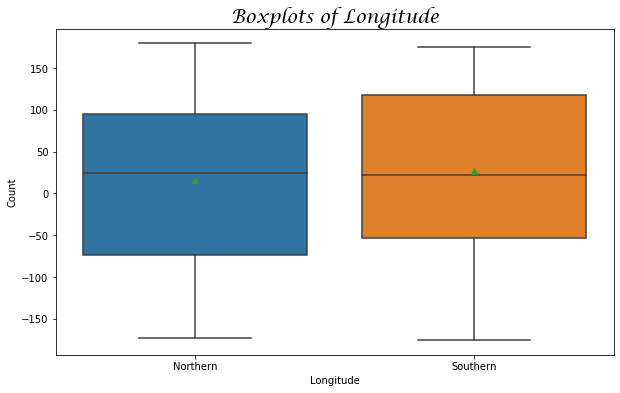

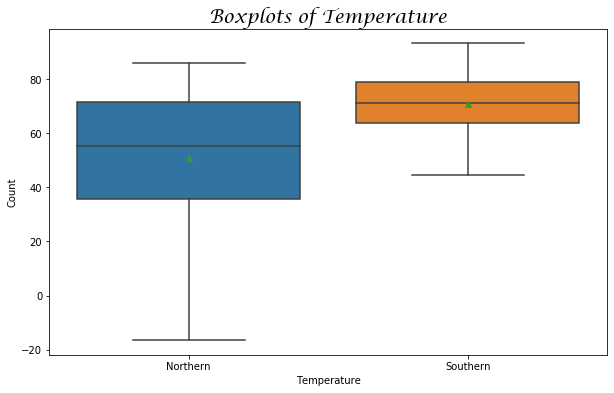

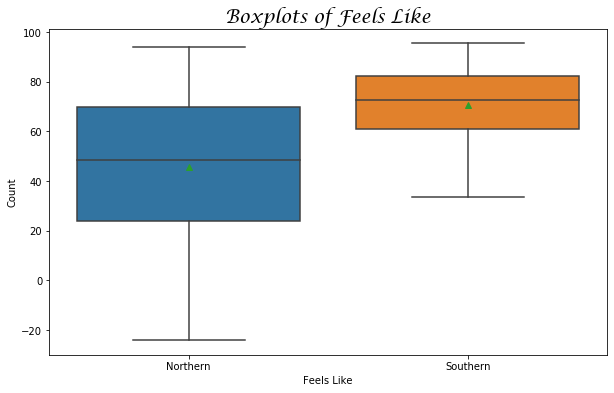

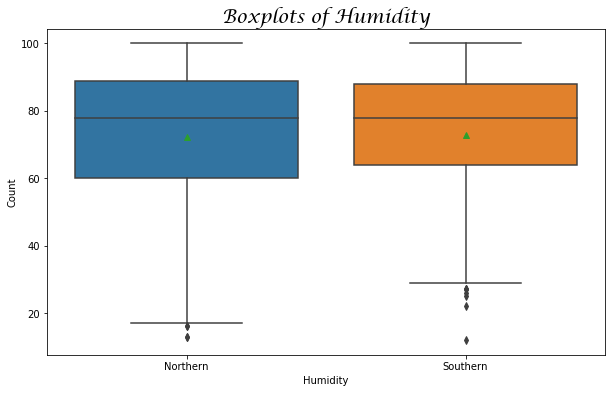

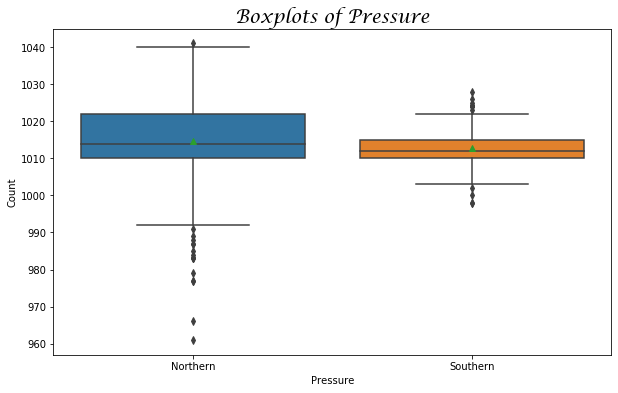

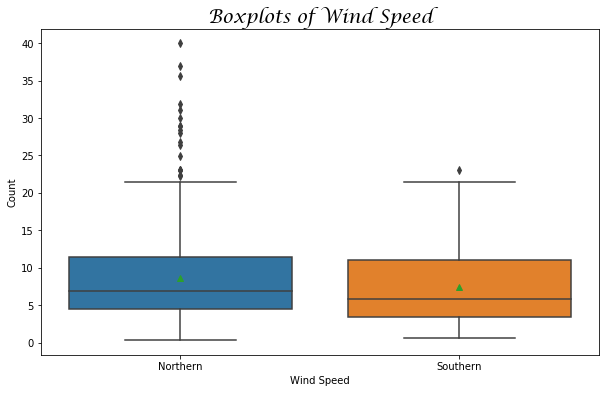

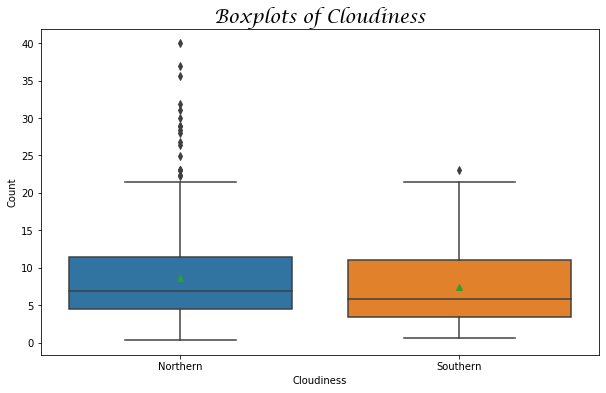

In [29]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.boxplot(x="Hemisphere_NS", y=col, data=df, showmeans="True")
        plt.title(f"Boxplots of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

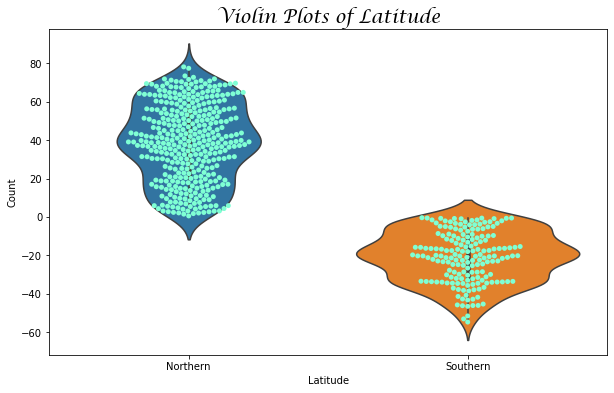

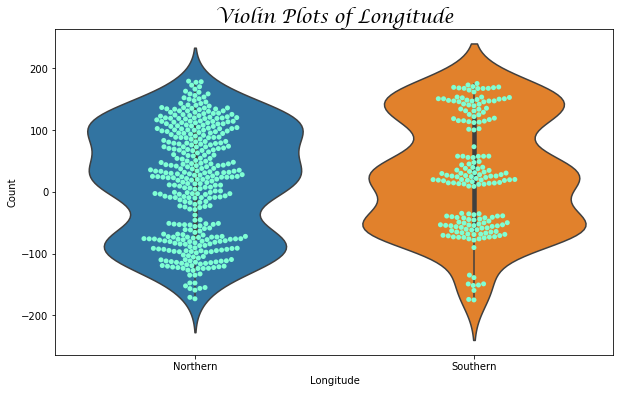

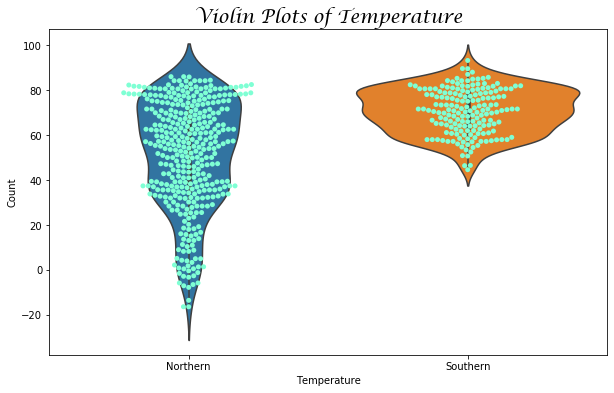

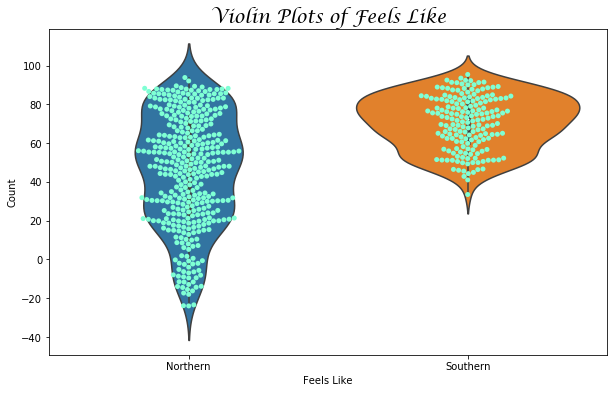

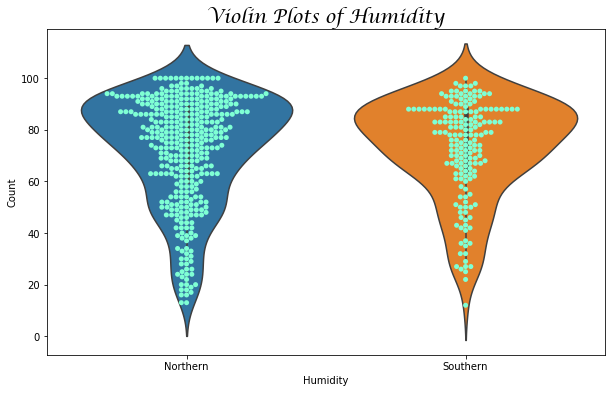

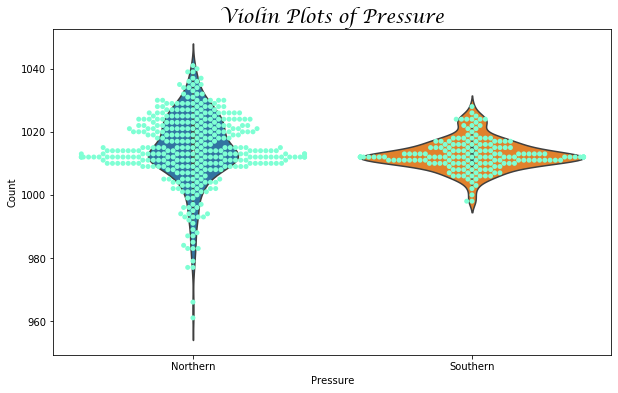

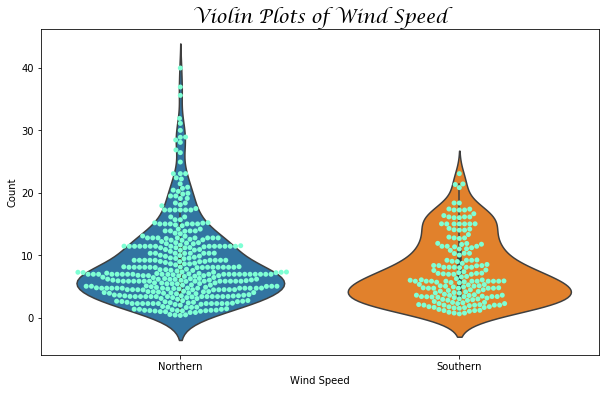

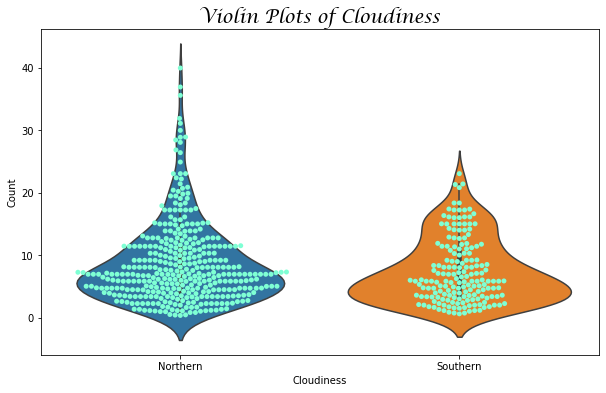

In [27]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.violinplot(x="Hemisphere_NS", y=col, data=df, showmeans="True")
        sns.swarmplot(x="Hemisphere_NS", y=col, data=df, color="aquamarine")
        plt.title(f"Violin Plots of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

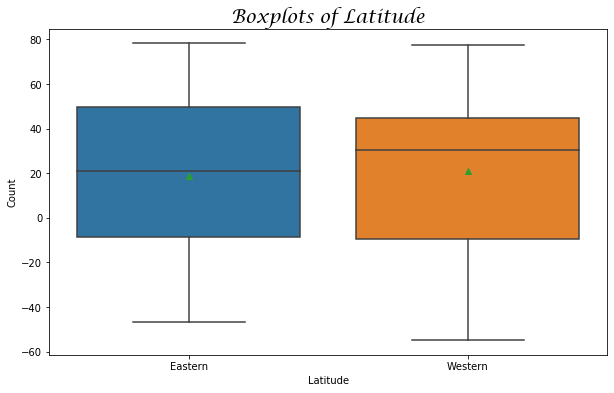

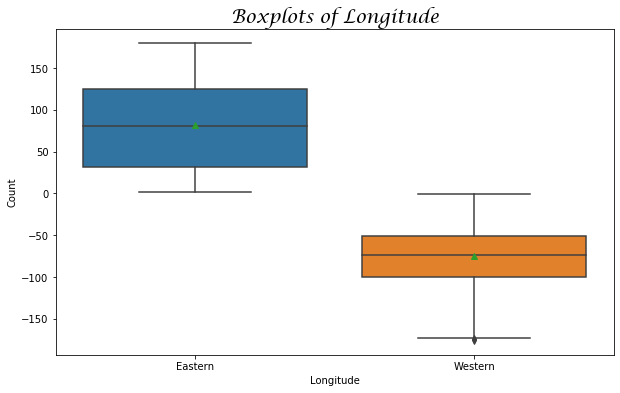

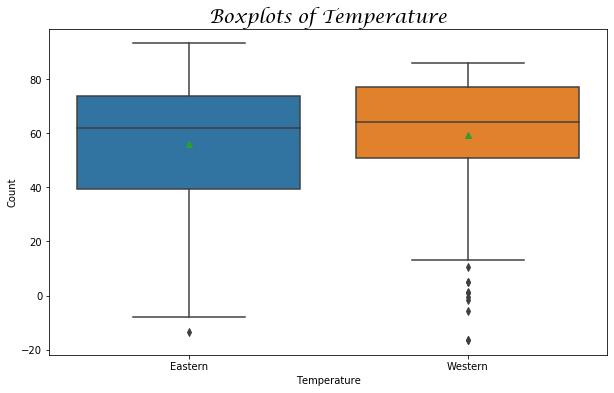

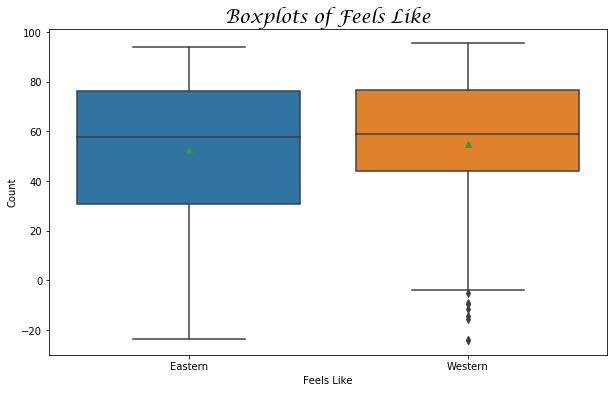

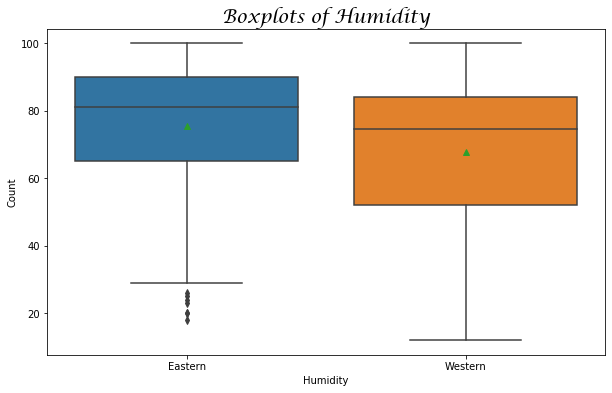

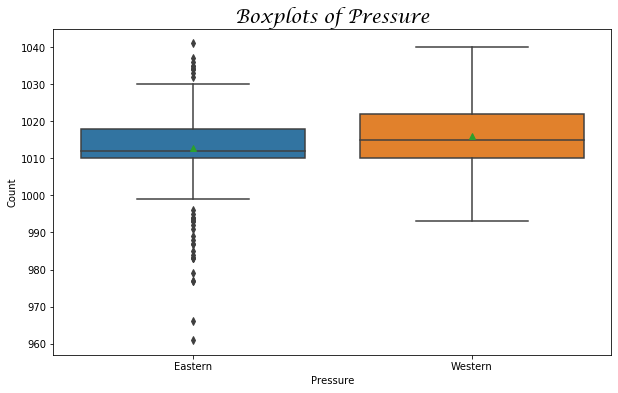

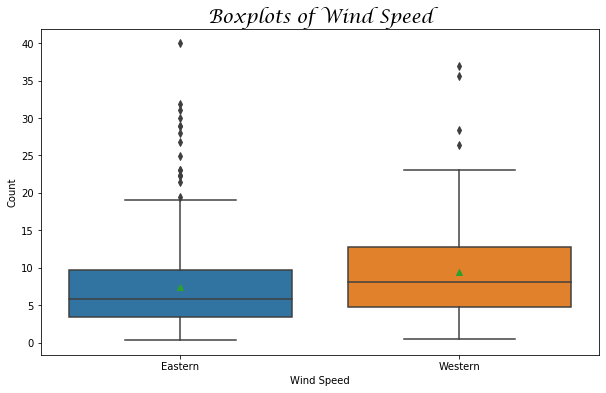

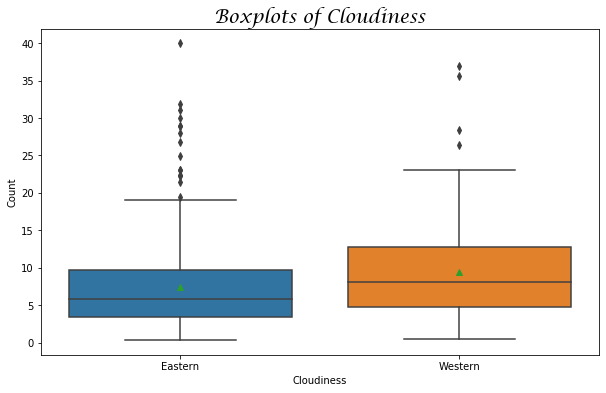

In [30]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.boxplot(x="Hemisphere_WE", y=col, data=df, showmeans="True")
        plt.title(f"Boxplots of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

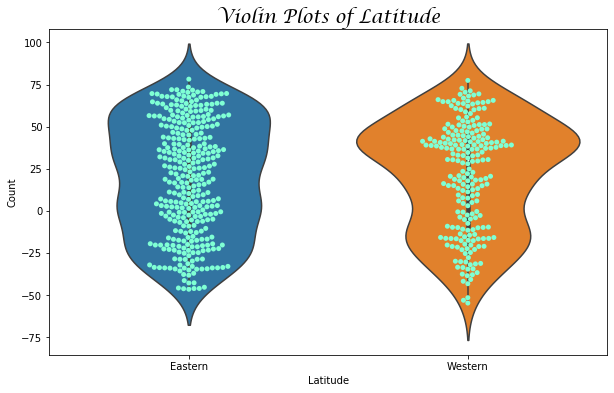

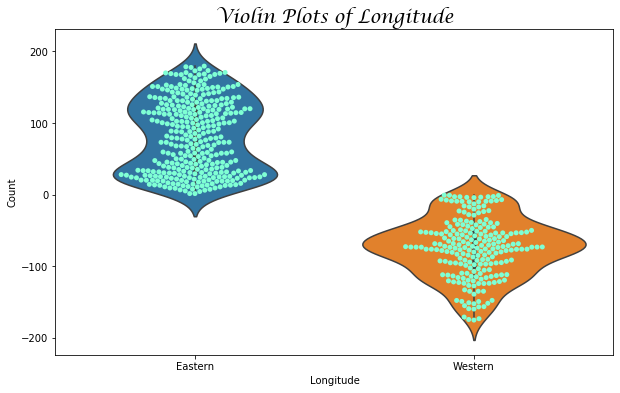

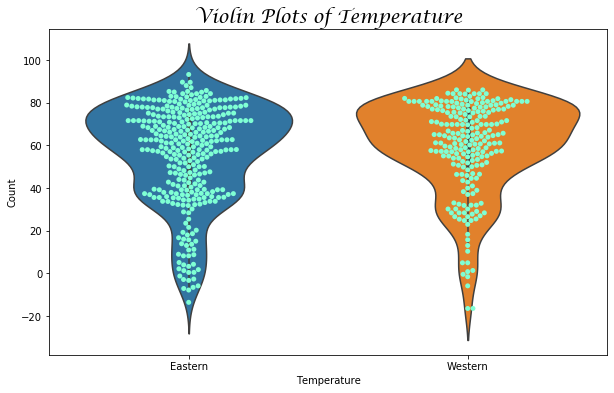

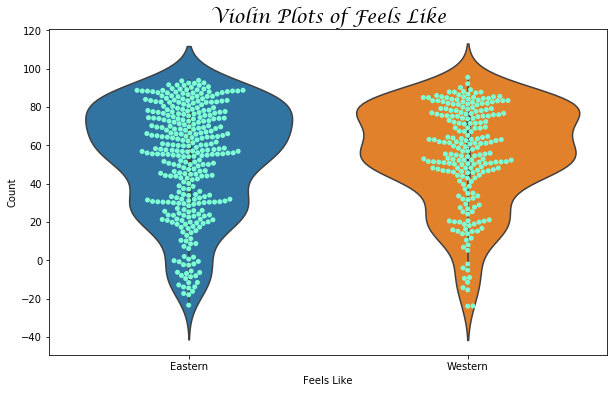

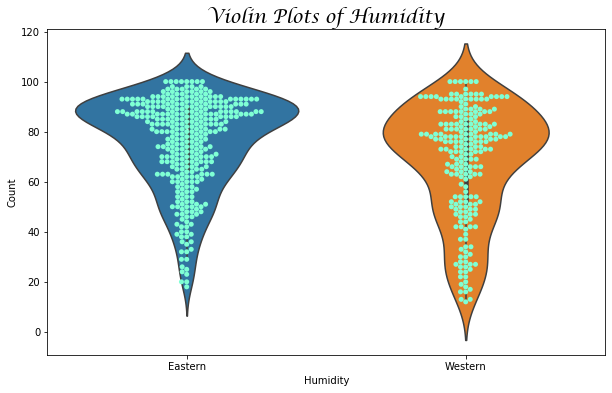

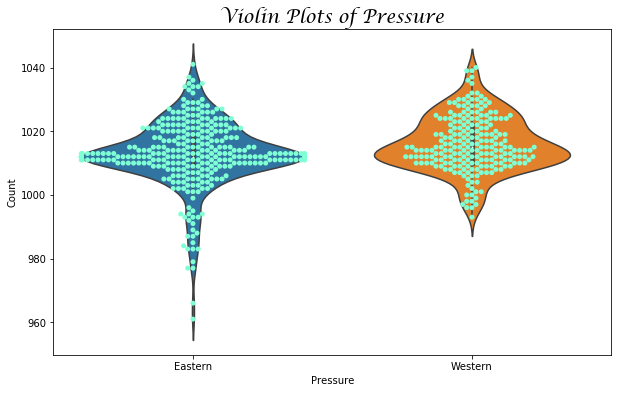

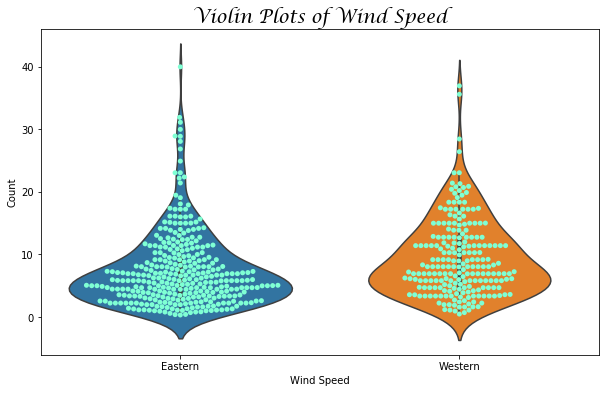

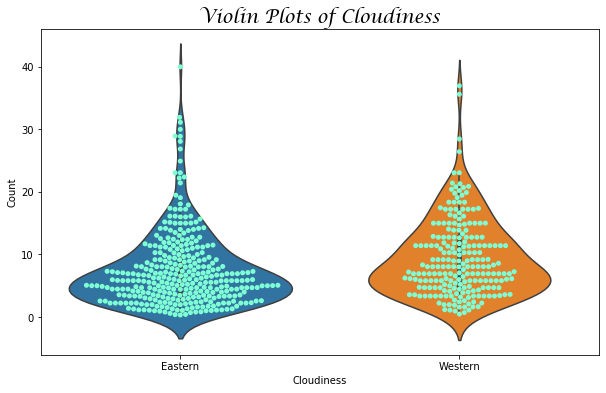

In [33]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))

        sns.violinplot(x="Hemisphere_WE", y=col, data=df, showmeans="True")
        sns.swarmplot(x="Hemisphere_WE", y=col, data=df, color="aquamarine")
        plt.title(f"Violin Plots of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

# Scatter

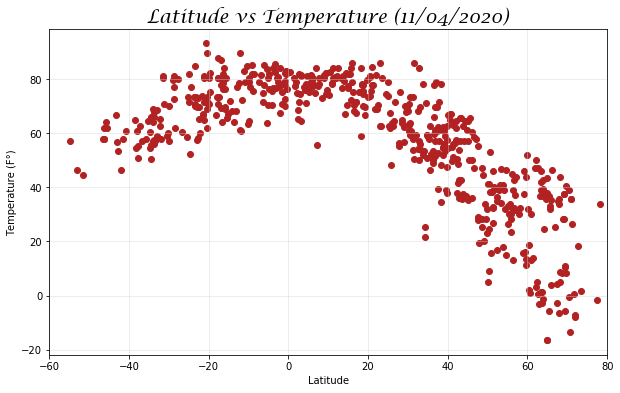

In [34]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "firebrick")
plt.title("Latitude vs Temperature (11/04/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

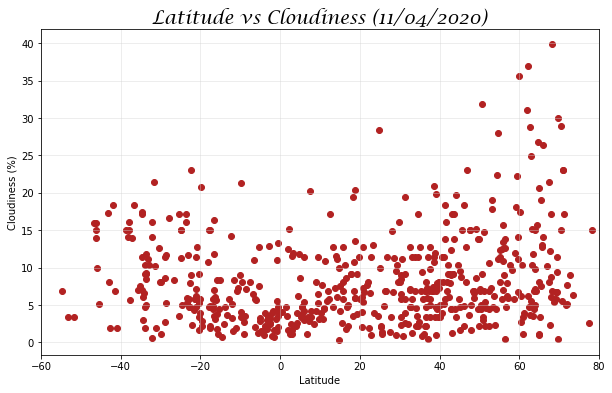

In [35]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "firebrick")
plt.title("Latitude vs Cloudiness (11/04/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

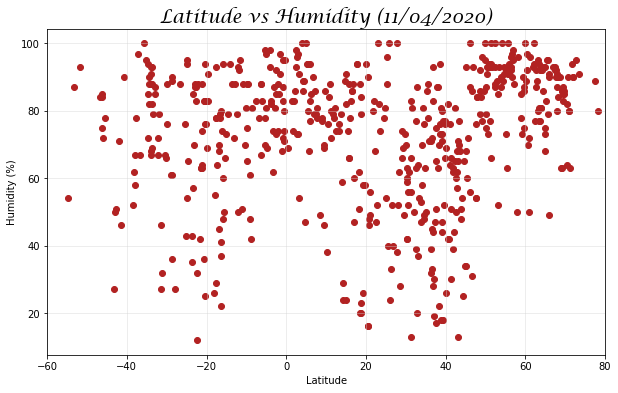

In [36]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "firebrick")
plt.title("Latitude vs Humidity (11/04/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

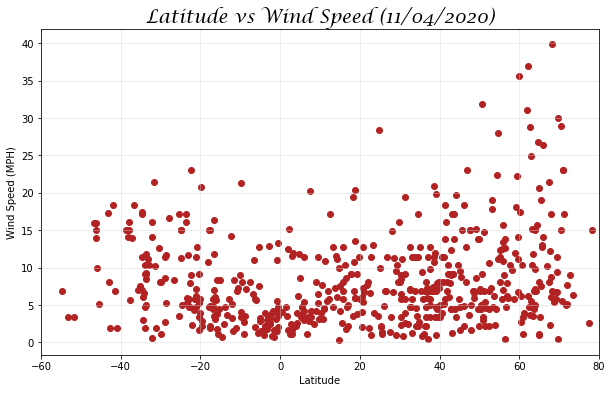

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "firebrick")
plt.title("Latitude vs Wind Speed (11/04/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

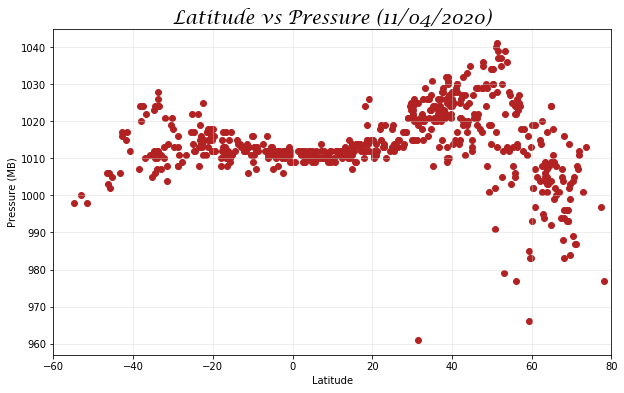

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Pressure, color = "firebrick")
plt.title("Latitude vs Pressure (11/04/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Pressure (MB)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

# Linear Regression

In [39]:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,-0.068891,-0.673010,-0.687194,0.106783,-0.007866,0.160288,0.160288
Longitude,-0.068891,1.000000,-0.098310,-0.063884,0.181946,-0.214220,-0.121078,-0.121078
Temperature,-0.673010,-0.098310,1.000000,0.983458,-0.319661,0.081202,-0.090657,-0.090657
Feels Like,-0.687194,-0.063884,0.983458,1.000000,-0.218308,0.078173,-0.228230,-0.228230
Humidity,0.106783,0.181946,-0.319661,-0.218308,1.000000,-0.171994,-0.006953,-0.006953
Pressure,-0.007866,-0.214220,0.081202,0.078173,-0.171994,1.000000,-0.204776,-0.204776
Wind Speed,0.160288,-0.121078,-0.090657,-0.228230,-0.006953,-0.204776,1.000000,1.000000
Cloudiness,0.160288,-0.121078,-0.090657,-0.228230,-0.006953,-0.204776,1.000000,1.000000


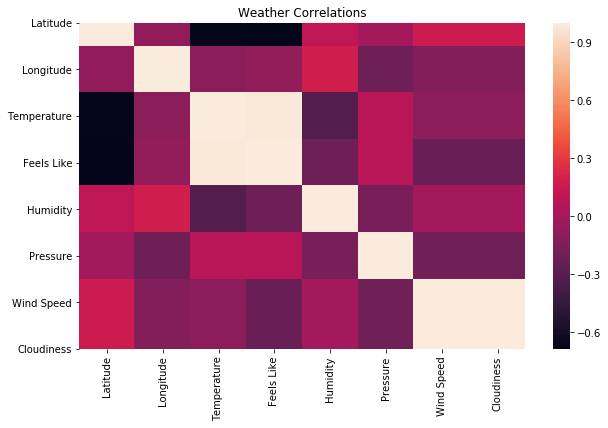

In [40]:
plt.figure(figsize=(10,6))

sns.heatmap(corrs)

plt.title("Weather Correlations")
plt.show()

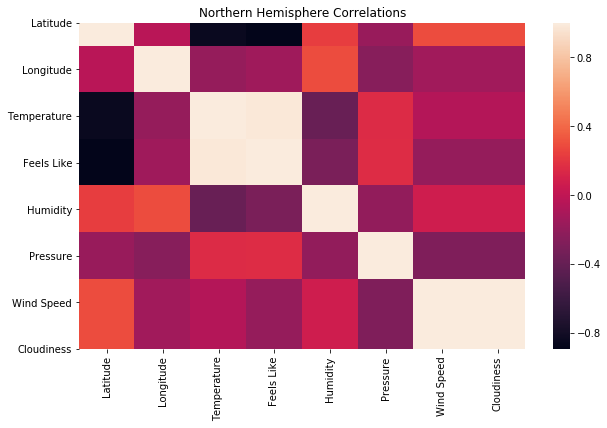

In [43]:
corrs2 = df.loc[df.Hemisphere_NS == "Northern"].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrs2)

plt.title("Northern Hemisphere Correlations")
plt.show()

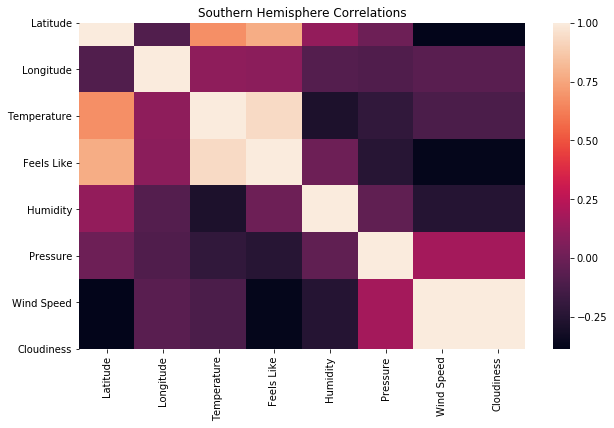

In [44]:
corrs3 = df.loc[df.Hemisphere_NS == "Southern"].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrs3)

plt.title("Southern Hemisphere Correlations")
plt.show()

In [45]:
target = df.Temperature
feature = df.Latitude

In [46]:
# STATSMODELS
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     462.8
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           3.01e-75
Time:                        18:30:05   Log-Likelihood:                -2378.5
No. Observations:                 561   AIC:                             4761.
Df Residuals:                     559   BIC:                             4770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.4191      0.827     80.322      0.000      64.795      68.043
Latitude      -0.4602      0.021    -21.514      0.000      -0.502      -0.418
==============================================================================
Omnibus:                       41.178   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.176
Skew:                          -0.724   Prob(JB):                     2.10e-11
Kurtosis:                       2.916   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.46x + 66.42'

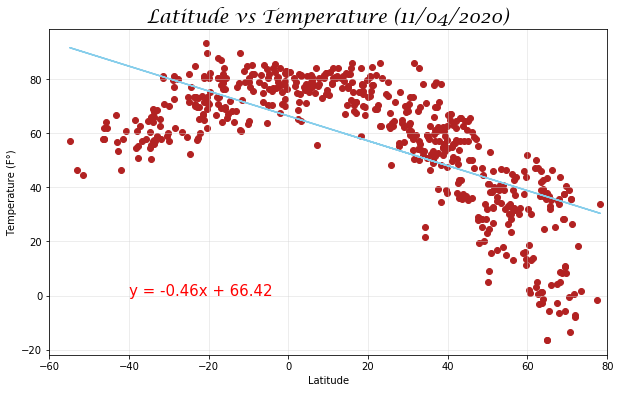

In [53]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "firebrick")
plt.title("Latitude vs Temperature (11/04/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)
plt.plot(feature, regress_values, color="skyblue")
plt.annotate(line_eq,(-40, 0),fontsize=15,color="red")

plt.show()

In [65]:
def doRegressionWork(hemisphere, df, inp_target):
    #filter
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere_WE == hemisphere]
        
    # get target
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # get equation
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # plot
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "firebrick")
    plt.title(f"Latitude vs {inp_target}(11/04/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="skyblue")
#     plt.annotate(line_eq,(-40, 0),fontsize=15,color="red")

    plt.show()

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           3.42e-25
Time:                        18:38:51   Log-Likelihood:                -610.34
No. Observations:                 179   AIC:                             1225.
Df Residuals:                     177   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.3726      1.032     78.879      0.0

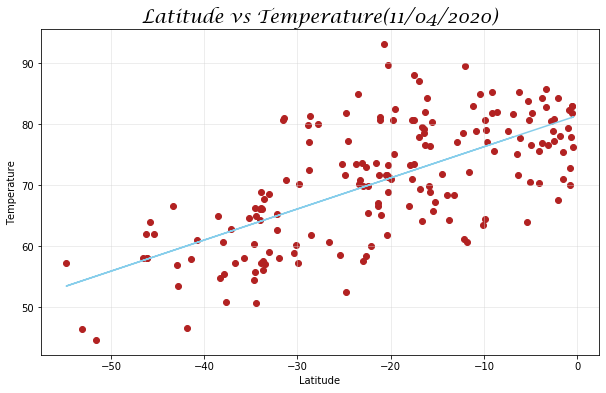

In [66]:
doRegressionWork("Southern", df, "Temperature")

                            OLS Regression Results                            
Dep. Variable:               Pressure   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     11.63
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           0.000718
Time:                        18:39:20   Log-Likelihood:                -1469.2
No. Observations:                 382   AIC:                             2942.
Df Residuals:                     380   BIC:                             2950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1018.4921      1.269    802.507      0.0

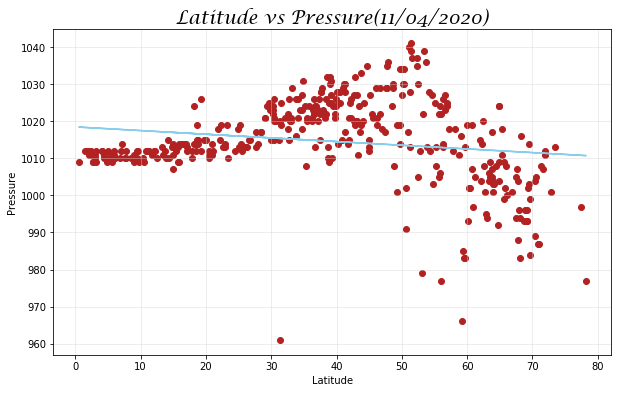

In [68]:
doRegressionWork("Northern", df, "Pressure")